# Informações sobre a base de dados
* Nome do dataset: adult.csv

* Descrição: Descrição: O nome da base de dados é adult.csv onde será realizada a classificação se determinado individuo recebe <=50K ou >50K, ou seja será realizada a Avaliação de Rendas

* Link fonte de dados: https://www.kaggle.com/uciml/adult-census-income?select=adult.csv

# Dicionario de dados com o nome de cada campo e os tipos dos dados
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)

### Formatação de Graficos Seaborn

In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_palette('tab10')

* Criadas as classes TratamentoDados e ProcessamentoDados usadas no modulo as mesmas serão importadas abaixo

In [3]:
from lib.processamento_dados import ProcessamentoDados as pr
from lib.tratamento_dados import TratamentoDados as tr

## Importando as bases de dados

* Na modulo A do projeto optei por utilizar uma função para renomear as colunas do dataset a fim de mostrar os valores originais na modulo B resolvi utilizar o novo nome das colunas ao importar os dados do arquivo csv

In [4]:
# cabeçalho com o nome das colunas do dataset
header_columns = ['Idade', 'Classe Trabalho', 'Peso Final', 'Educacao', 'Num Educacao', 'Estado Civil', 
                  'Ocupacao','Relacao', 'Raca', 'Sexo', 'Ganho Capital', 'Perda Capital', 'Horas Semana', 
                  'Pais Nativo', 'Renda']

In [5]:
renda = pd.read_csv("base/adult.csv", names=header_columns, skiprows=1)

## Exibindo os dados do data set

In [6]:
renda.head()

,Idade,Classe Trabalho,Peso Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho Capital,Perda Capital,Horas Semana,Pais Nativo,Renda
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Processamento e Tratamento dos dados

## Substituindo os espaços em branco por Nan

In [7]:
renda = tr.tratamento_espaco_branco(renda)

## Tratamento de dados ausentes

### Tratamento de dados ausentes na coluna Classe Trabalho

In [8]:
renda = tr.tratamento_dados_ausentes(renda, 'Classe Trabalho')

### Tratamento de dados ausentes na coluna Coluna Ocupacao

In [9]:
renda = tr.tratamento_dados_ausentes(renda, 'Ocupacao')

### Tratamento de dados ausentes na coluna Pais Nativo

In [10]:
renda = tr.tratamento_dados_ausentes(renda, 'Pais Nativo')

## Verificando se ainda temos dados ausentes
* Podemos perceber já não temos mais dados ausentes no dataset

In [11]:
renda.isnull().sum()

Idade              0
Classe Trabalho    0
Peso Final         0
Educacao           0
Num Educacao       0
Estado Civil       0
Ocupacao           0
Relacao            0
Raca               0
Sexo               0
Ganho Capital      0
Perda Capital      0
Horas Semana       0
Pais Nativo        0
Renda              0
dtype: int64

# Criação de Novas Features

In [12]:
renda1 = pd.DataFrame()

### Nova coluna Porcentagem de Ganho Capital

In [13]:
soma_ganho = renda['Ganho Capital'].sum()
renda1['Porc Ganho Capital'] = (renda['Ganho Capital'] / soma_ganho) * 100

### Nova coluna Porcentagem de Perda Capital

In [14]:
soma_perda = renda['Perda Capital'].sum()
renda1['Porc Perda Capital'] = (renda['Perda Capital'] / soma_perda) * 100

### Nova coluna Faixa Etaria

In [15]:
for index, row in renda.iterrows():
    
    if row['Idade'] >= 0 and row['Idade'] <= 10:
        renda1.loc[index, 'Faixa Etaria'] = '0 - 10'
        
    elif row['Idade'] >= 11 and row['Idade'] <= 20:        
        renda1.loc[index, 'Faixa Etaria'] = '11 - 20'
        
    elif row['Idade'] >= 21 and row['Idade'] <= 30:        
        renda1.loc[index, 'Faixa Etaria'] = '21 - 30'        
    
    elif row['Idade'] >= 31 and row['Idade'] <= 40:        
        renda1.loc[index, 'Faixa Etaria'] = '31 - 40'
        
    elif row['Idade'] >= 41 and row['Idade'] <= 50:        
        renda1.loc[index, 'Faixa Etaria'] = '41 - 50'        
        
    elif row['Idade'] >= 51 and row['Idade'] <= 60:        
        renda1.loc[index, 'Faixa Etaria'] = '51 - 60'        
        
    elif row['Idade'] >= 61 and row['Idade'] <= 70:        
        renda1.loc[index, 'Faixa Etaria'] = '61 - 70'  
        
    elif row['Idade'] >= 71 and row['Idade'] <= 80:        
        renda1.loc[index, 'Faixa Etaria'] = '71 - 80'         
        
    elif row['Idade'] >= 81 and row['Idade'] <= 90:        
        renda1.loc[index, 'Faixa Etaria'] = '81 - 90'         
        
    else:
        renda1.loc[index, 'Faixa Etaria'] = '91 - 100'

### Nova coluna Codigo Pessoa
* Essa coluna sera usada como código unico de cada pessoa

In [16]:
renda1['Codigo Pessoa'] = 0

#Cria os codigos
cont = 1
for index, row in renda1.iterrows():
    renda1.loc[index, 'Codigo Pessoa'] = cont
    cont = cont + 1

In [17]:
renda1.head(10)

,Porc Ganho Capital,Porc Perda Capital,Faixa Etaria,Codigo Pessoa
0,0.0,0.153235,81 - 90,1
1,0.0,0.153235,81 - 90,2
2,0.0,0.153235,61 - 70,3
3,0.0,0.137194,51 - 60,4
4,0.0,0.137194,41 - 50,5
5,0.0,0.132620,31 - 40,6
6,0.0,0.132620,31 - 40,7
7,0.0,0.129560,71 - 80,8
8,0.0,0.129560,61 - 70,9
9,0.0,0.105674,41 - 50,10


## Concatenando os dataframes

* Concatena todas as colunas de renda com exceção da coluna "Renda" do dataframe renda com as novas features criadas ao qual 
estão no dataframe renda1 e no final insere concatena a variavel alvo "Renda"

In [18]:
renda2 = pd.concat([renda1['Codigo Pessoa'], renda.iloc[:,:-1], renda1.iloc[:,:-1], renda['Renda']], axis = 1)

In [19]:
renda2.head()

,Codigo Pessoa,Idade,Classe Trabalho,Peso Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho Capital,Perda Capital,Horas Semana,Pais Nativo,Porc Ganho Capital,Porc Perda Capital,Faixa Etaria,Renda
0,1,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0.0,0.153235,81 - 90,<=50K
1,2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0.0,0.153235,81 - 90,<=50K
2,3,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0.0,0.153235,61 - 70,<=50K
3,4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0.0,0.137194,51 - 60,<=50K
4,5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0.0,0.137194,41 - 50,<=50K


# Analise Exploratória dos dados

## Informações estatistica sobre a base de dados

### Parametros Numéricos

In [20]:
renda2.describe()

,Codigo Pessoa,Idade,Peso Final,Num Educacao,Ganho Capital,Perda Capital,Horas Semana,Porc Ganho Capital,Porc Perda Capital
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.003071,0.003071
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.021047,0.014175
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8141.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,16281.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,24421.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,0.284984,0.153235


### Analisando os dados estatisticos da base de dados para variaveis numéricas, podemos tirar algumas conclusões:     
* Idade - o idade minima é 17 e o maxima é 90, sendo que a média de idade das pessoas da base de dados é 38, 
precisamos analisar o porque dessa diferença de idade, pode ser outilier
* Ganho Capital: o ganho minimo é 0 e o maximo é 99999, sendo que há média esta em 1077,65, há uma diferença 
muito grande, precisamos analisar o porque dessa diferença de ganho de capital, pode ser outlier
* Horas Semanas: as horas da semana trabalhada o minimo é 1 e o maximo é 99, sendo que a média de horas trabalhadas 
é 40 há uma diferença grande, precisamos analisar se isso não pode ser outlier     

### Parâmetros Categóricos

In [21]:
renda2.describe(include=['O'])

,Classe Trabalho,Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Pais Nativo,Faixa Etaria,Renda
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,8,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,31 - 40,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,8546,24720


### Analisando os dados estatisticos da base de dados para variaveis categóricas, podemos tirar algumas conclusões:
* Classe Trabalho: A moda para essa variavel é Private e tem uma frequencia de 24352 na base de dados
* Educacao: A moda para essa variavel é HS-grad e tem uma frequencia de 10501 na base de dados
* Estado Civil: A moda para essa variavel é Married-civ-spouse e tem uma frequencia de 14976 na base de dados
* Ocupacao: A moda para essa variavel é Prof-specialty e tem uma frequencia de 5983 na base de dados
* Relacao: A moda para essa variavel é Husband e tem uma frequencia de 13193 na base de dados
* Raca: A moda para essa variavel é White e tem uma frequencia de 27816 na base de dados, a maioria da raça presente na base 
dados é White
* Sexo: A moda para essa variavel é Male e tem uma frequencia de 21790 na base de dados, a maioria de pessoas presentes na base de dados é do sexo masculino
* Pais Nativo: A moda para essa variavel é United-States e tem uma frequencia de 29753	na base de dados, a maioria das pessoas
presente na base de dados são dos Estados Unidos temos a presença de poucos estrangeiros
* Faixa Etaria: A moda para essa variavel é 31 - 40 e tem uma frequencia de 8546 na base de dados
* Renda: A moda para essa variavel é <=50K e tem uma frequencia de 24720 na base de dados, essa é a variavel alvo do nosso
projeto de predição e podemos perceber que a maioria das pessoas recebem menos que 50K.

# Respostas a algumas perguntas e curiosidades sobre a base de dados

* Na sequencia abaixo será respondida a algumas questões e curiosidades sobre a base de dados

In [22]:
def gera_grafico_barras_horizontal(eixo_x, eixo_y, desc_coluna_x, desc_coluna_y, data):
    g = sns.barplot(x=eixo_x, y=eixo_y, data=data)
    g.set_xlabel(desc_coluna_x, size = 16,color="black")
    g.set_ylabel(desc_coluna_y, size = 16,color="black")
    sns.despine(left=True, bottom=True)
    plt.show()

### Qual a maior idade por sexo?
* Podemos perceber que a maior idade da base de dados é 90.

In [23]:
renda2[['Sexo', 'Idade']].max()

Sexo     Male
Idade      90
dtype: object

### Qual a menor idade por sexo?
* Podemos perceber que a menor idade da base de dados é 17.

In [24]:
renda2[['Sexo', 'Idade']].min()

Sexo     Female
Idade        17
dtype: object

### Qual o total de horas trabalhadas na semana por raça?

In [25]:
renda2[['Raca', 'Horas Semana']].groupby(['Raca'])\
.sum().sort_values(by='Horas Semana', ascending=False)

,Horas Semana
Raca,
White,1131808
Black,120033
Asian-Pac-Islander,41692
Amer-Indian-Eskimo,12455
Other,10696


### Grafico de total de horas trabalhadas na semana por raça

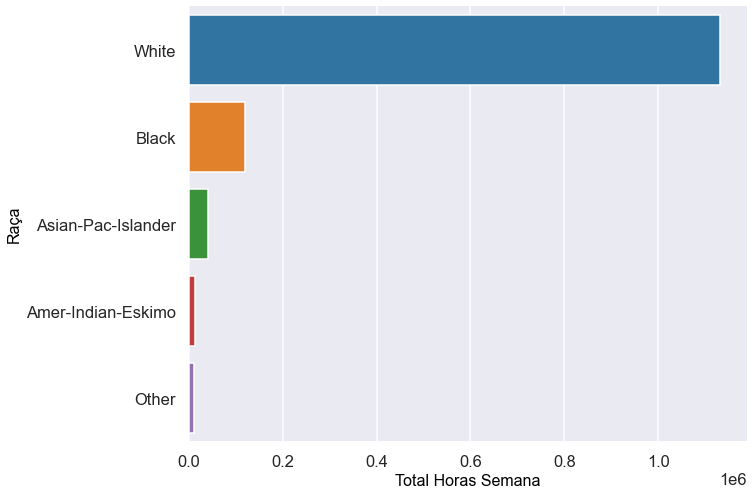

In [26]:
total_semana_raca = renda2[['Raca', 'Horas Semana']].groupby(['Raca'])\
.sum().sort_values(by='Horas Semana', ascending=False).reset_index()

gera_grafico_barras_horizontal(total_semana_raca['Horas Semana'], total_semana_raca['Raca'], 
                               "Total Horas Semana", "Raça", renda2)

### Qual o total de horas trabalhadas na semana por faixa etária?

In [27]:
renda2[['Faixa Etaria', 'Horas Semana']].groupby(['Faixa Etaria'])\
.sum().sort_values(by='Horas Semana', ascending=False)

,Horas Semana
Faixa Etaria,
31 - 40,369807
21 - 30,322978
41 - 50,302942
51 - 60,174878
11 - 20,68842
61 - 70,62831
71 - 80,11480
81 - 90,2926


### Grafico de total de horas trabalhadas na semana por Faixa Etária

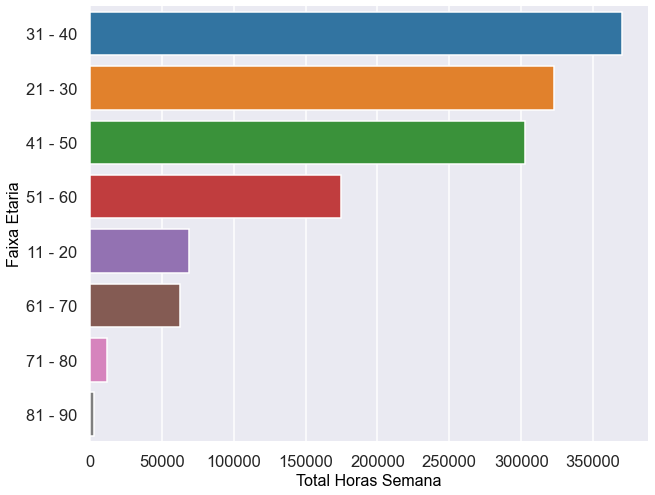

In [28]:
total_semana_faixa = renda2[['Faixa Etaria', 'Horas Semana']].groupby(['Faixa Etaria'])\
.sum().sort_values(by='Horas Semana', ascending=False).reset_index()

gera_grafico_barras_horizontal(total_semana_faixa['Horas Semana'], total_semana_faixa['Faixa Etaria'], 
                               "Total Horas Semana", "Faixa Etaria", renda2)

### Qual a quantidade de pessoas por Estado Civil?

In [29]:
renda2[['Estado Civil', 'Codigo Pessoa']].groupby(['Estado Civil'])\
.count().sort_values(by='Codigo Pessoa', ascending=False)

,Codigo Pessoa
Estado Civil,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


### Grafico das quantidades de pessoas por Estado Civil

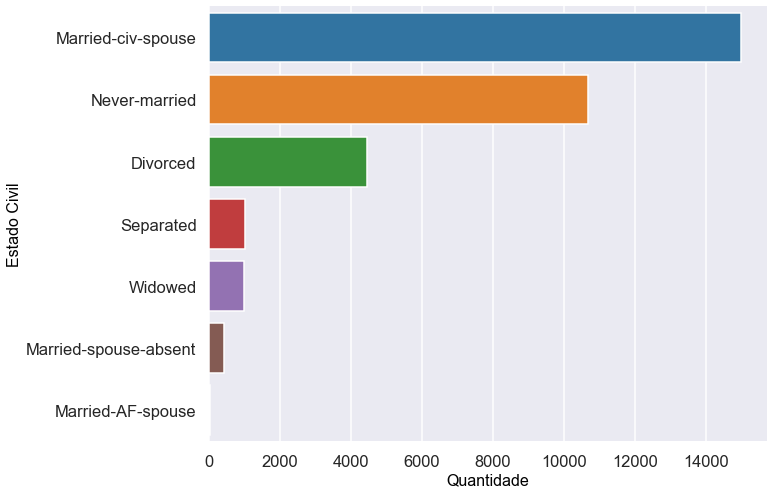

In [31]:
total_qtd_estado_civil = renda2[['Estado Civil', 'Codigo Pessoa']].groupby(['Estado Civil'])\
.count().sort_values(by='Codigo Pessoa', ascending=False).reset_index()

gera_grafico_barras_horizontal(total_qtd_estado_civil['Codigo Pessoa'], total_qtd_estado_civil['Estado Civil'], 
                               "Quantidade", "Estado Civil", renda2)

### Qual a quantidade de pessoas por raça?

In [32]:
renda2[['Raca', 'Codigo Pessoa']].groupby(['Raca'])\
.count().sort_values(by='Codigo Pessoa', ascending=False)

,Codigo Pessoa
Raca,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


### Grafico das quantidades de pessoas por Raça

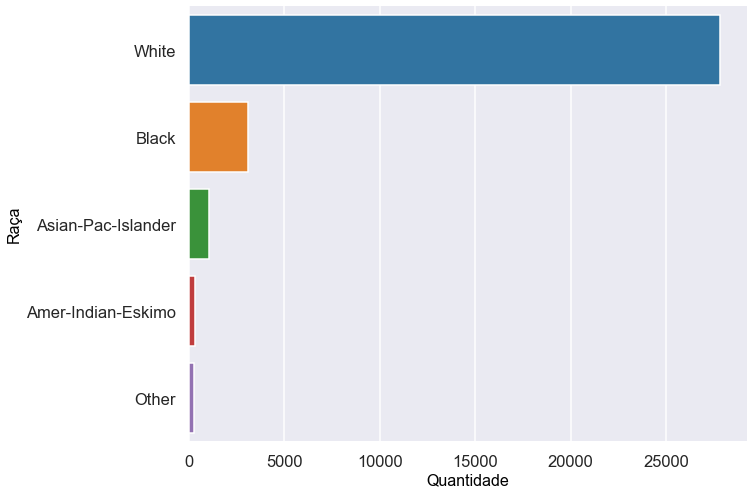

In [33]:
qtd_raca = renda2[['Raca', 'Codigo Pessoa']].groupby(['Raca'])\
.count().sort_values(by='Codigo Pessoa', ascending=False).reset_index()

gera_grafico_barras_horizontal(qtd_raca['Codigo Pessoa'], qtd_raca['Raca'], 
                               "Quantidade", "Raça", renda2)

### Qual a quantidade de pessoas por raça e relação ?

In [34]:
renda2[['Raca', 'Relacao', 'Codigo Pessoa']].groupby(['Raca', 'Relacao'])\
.count().sort_values(by='Codigo Pessoa', ascending=False).head(10)

Codigo Pessoa
Raca  Relacao                      
White Husband                 11940
      Not-in-family            7125
      Own-child                4255
      Unmarried                2491
      Wife                     1311
Black Not-in-family             812
      Unmarried                 769
White Other-relative            694
Black Husband                   671
      Own-child                 555

### Qual a quantidade de pessoas por Pais Nativo? 

In [35]:
renda2[['Pais Nativo', 'Codigo Pessoa']].groupby(['Pais Nativo'])\
.count().sort_values(by='Codigo Pessoa', ascending=False).head(10)

,Codigo Pessoa
Pais Nativo,
United-States,29753
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


### Grafico das quantidades de pessoas por Pais Nativo

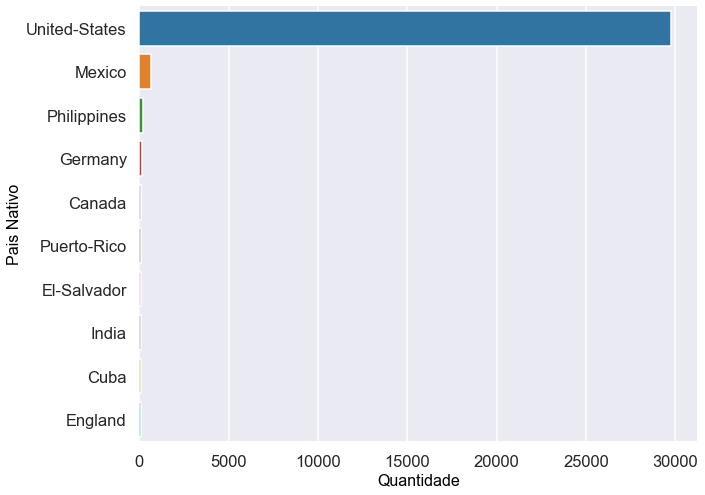

In [36]:
qtd_pais_nativo = renda2[['Pais Nativo', 'Codigo Pessoa']].groupby(['Pais Nativo'])\
.count().sort_values(by='Codigo Pessoa', ascending=False).head(10).reset_index()

gera_grafico_barras_horizontal(qtd_pais_nativo['Codigo Pessoa'], qtd_pais_nativo['Pais Nativo'], 
                               "Quantidade", "Pais Nativo", renda2)

### Qual a quantidade de pessoas por Renda? 

In [37]:
renda2[['Renda', 'Codigo Pessoa']].groupby(['Renda'])\
.count().sort_values(by='Codigo Pessoa', ascending=False).head(10)

,Codigo Pessoa
Renda,
<=50K,24720
>50K,7841


### Grafico das quantidades de pessoas por Renda

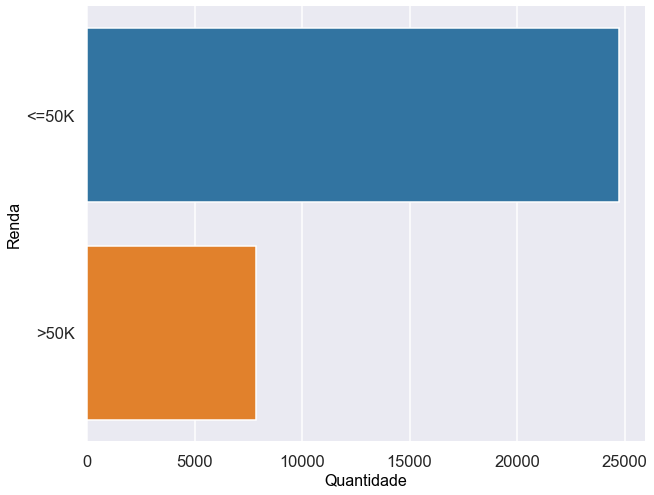

In [38]:
qtd_renda = renda2[['Renda', 'Codigo Pessoa']].groupby(['Renda'])\
.count().sort_values(by='Codigo Pessoa', ascending=False).head(10).reset_index()

gera_grafico_barras_horizontal(qtd_renda['Codigo Pessoa'], qtd_renda['Renda'], 
                               "Quantidade", "Renda", renda2)

### Qual a media da ganho de capital das pessoas por renda e Classe de Trabalho?

In [39]:
renda2[['Renda', 'Classe Trabalho', 'Ganho Capital']].groupby(['Renda', 'Classe Trabalho'])\
.mean().sort_values(by='Ganho Capital', ascending=False).head(10)

Ganho Capital
Renda Classe Trabalho                
>50K  Self-emp-inc        8606.705788
      Self-emp-not-inc    6065.330110
      Private             3608.149593
      Local-gov           2581.126418
      State-gov           2211.475921
      Federal-gov         1881.088949
<=50K Without-pay          487.857143
      Self-emp-not-inc     220.794717
      Self-emp-inc         177.941296
      Federal-gov          173.207131

### Qual a media da ganho de capital das pessoas por renda e sexo?

In [40]:
renda2[['Renda', 'Sexo', 'Ganho Capital']].groupby(['Renda', 'Sexo'])\
.mean().sort_values(by='Ganho Capital', ascending=False).head(10)

Ganho Capital
Renda Sexo                 
>50K  Female    4200.389313
      Male      3971.765836
<=50K Male       165.723823
      Female     121.986134

### Qual o total de ganho de capital por Ocupação?

In [41]:
renda2[['Ocupacao', 'Ganho Capital']].groupby(['Ocupacao'])\
.sum().sort_values(by='Ganho Capital', ascending=False).head(10)

,Ganho Capital
Ocupacao,
Prof-specialty,12402613
Exec-managerial,9200435
Sales,4817377
Craft-repair,2662353
Adm-clerical,1869750
Transport-moving,783047
Machine-op-inspct,658036
Other-service,630339
Tech-support,625057


### Grafico do total de ganho de capital por Ocupação?

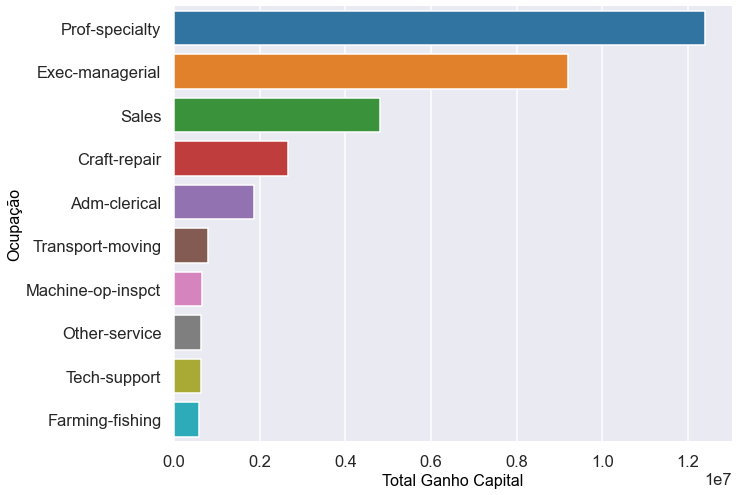

In [42]:
total_ocupacao = renda2[['Ocupacao', 'Ganho Capital']].groupby(['Ocupacao'])\
.sum().sort_values(by='Ganho Capital', ascending=False).head(10).reset_index()

gera_grafico_barras_horizontal(total_ocupacao['Ganho Capital'], total_ocupacao['Ocupacao'], 
                               "Total Ganho Capital", "Ocupação", renda2)

### Qual o maior ganho de capital por Ocupacao?

In [43]:
renda2[['Ocupacao', 'Ganho Capital']].max()

Ocupacao         Transport-moving
Ganho Capital               99999
dtype: object

### Qual a maior perda de capital por Idade, Sexo, Ocupacao?

In [44]:
renda2[['Idade', 'Sexo', 'Ocupacao','Perda Capital']].max()

Idade                          90
Sexo                         Male
Ocupacao         Transport-moving
Perda Capital                4356
dtype: object

# Analise Grafica da base de dados

## Analise Univariada

### Variaveis Numericas

### Grafico de Distribuição da Idade

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Idade', ylabel='Density'>

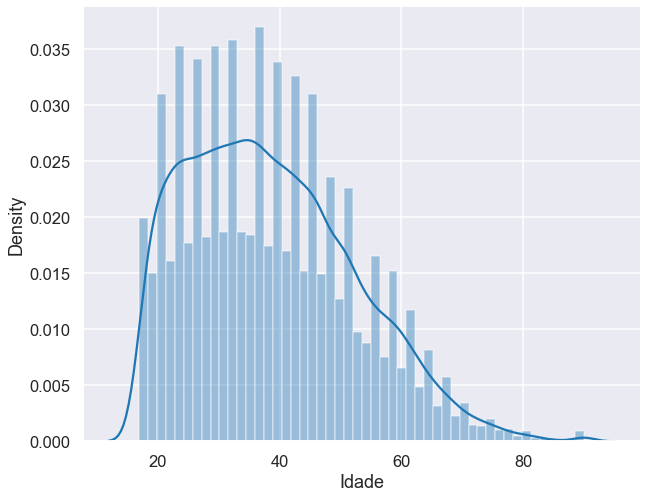

In [45]:
sns.distplot(renda2['Idade'], bins=50)

### Grafico BoxPlot da Idade

<AxesSubplot:ylabel='Idade'>

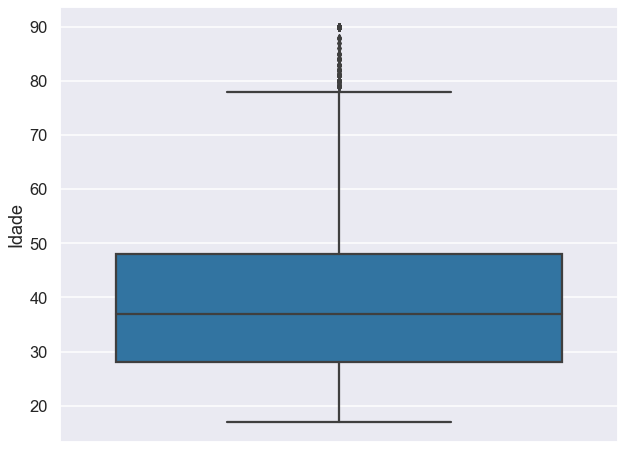

In [46]:
sns.boxplot(y="Idade", data=renda2)

### Grafico de Distribuição de Horas Semana

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Horas Semana', ylabel='Density'>

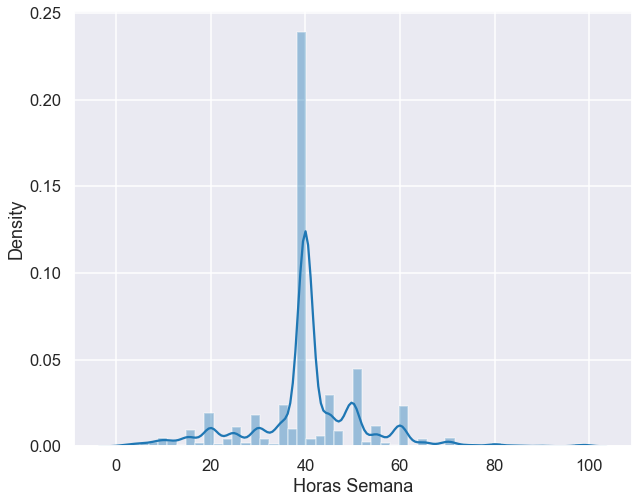

In [47]:
sns.distplot(renda2['Horas Semana'], bins=50)

### Grafico de BoxPlot de Horas Semana

<AxesSubplot:ylabel='Horas Semana'>

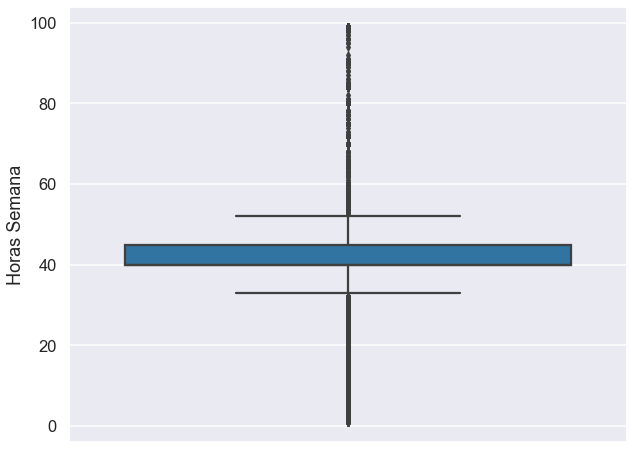

In [48]:
sns.boxplot(y="Horas Semana", data=renda2)

### Grafico de Distribuição de Ganho Capital

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ganho Capital', ylabel='Density'>

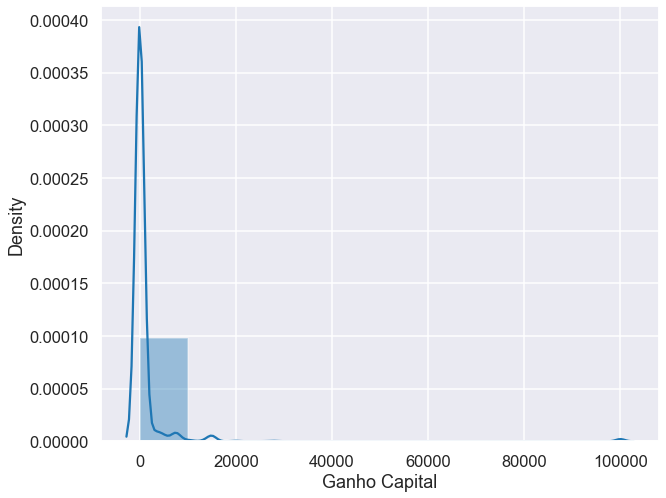

In [49]:
sns.distplot(renda2['Ganho Capital'], bins=10)

### Grafico de BoxPlot de Ganho Capital

<AxesSubplot:ylabel='Ganho Capital'>

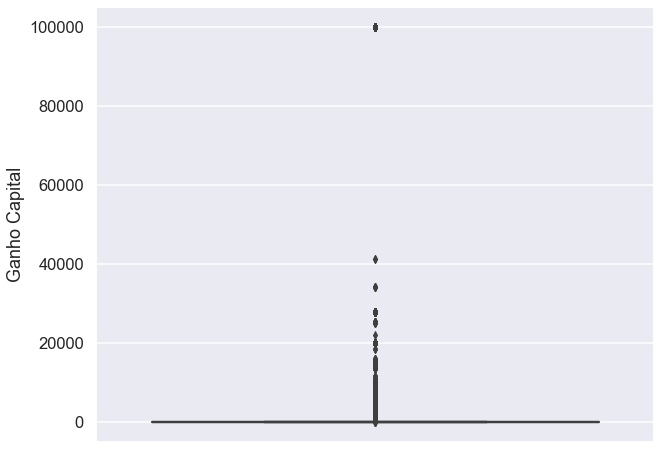

In [50]:
sns.boxplot(y="Ganho Capital", data=renda2)

### Grafico de Distribuição de Perda Capital

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Perda Capital', ylabel='Density'>

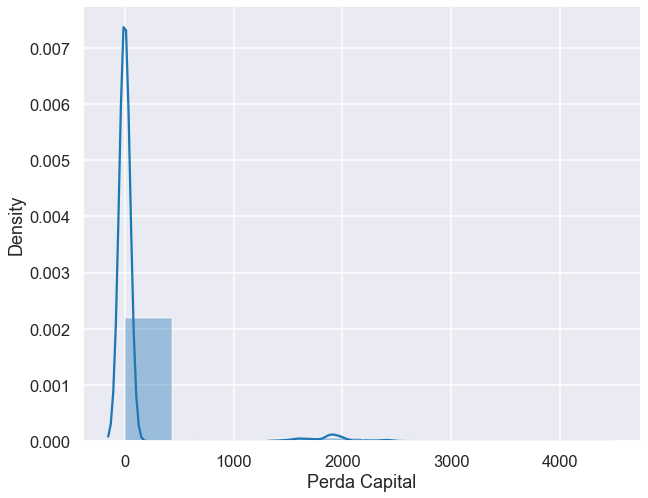

In [51]:
sns.distplot(renda2['Perda Capital'], bins=10)

### Grafico de BoxPlot de Perda Capital

<AxesSubplot:ylabel='Perda Capital'>

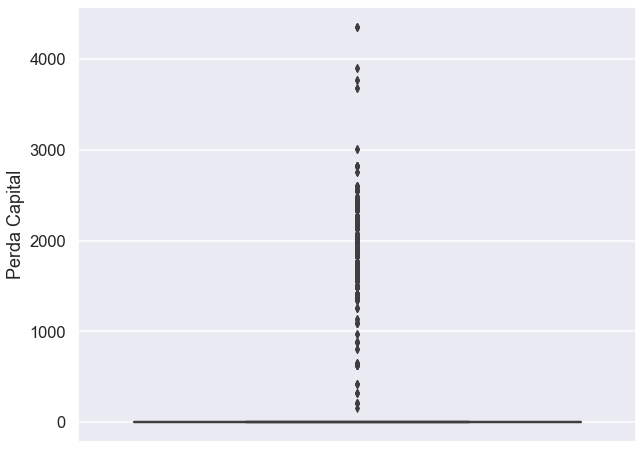

In [52]:
sns.boxplot(y="Perda Capital", data=renda2)

### Grafico de Distribuição de Porc Ganho Capital

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Porc Ganho Capital', ylabel='Density'>

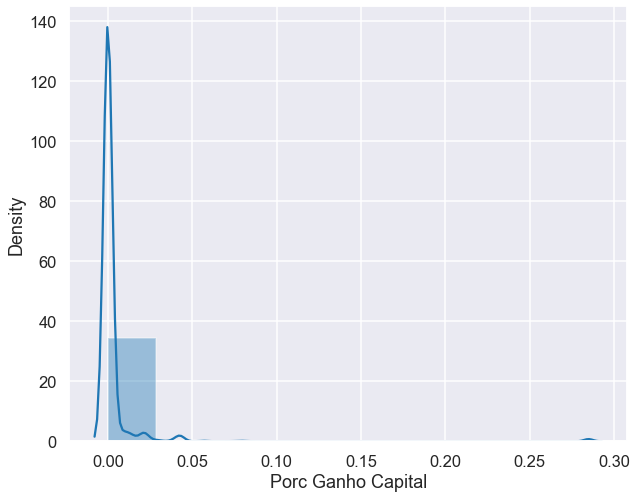

In [53]:
sns.distplot(renda2['Porc Ganho Capital'], bins=10)

### Grafico de Boxplot de Porc Ganho Capital

<AxesSubplot:ylabel='Porc Ganho Capital'>

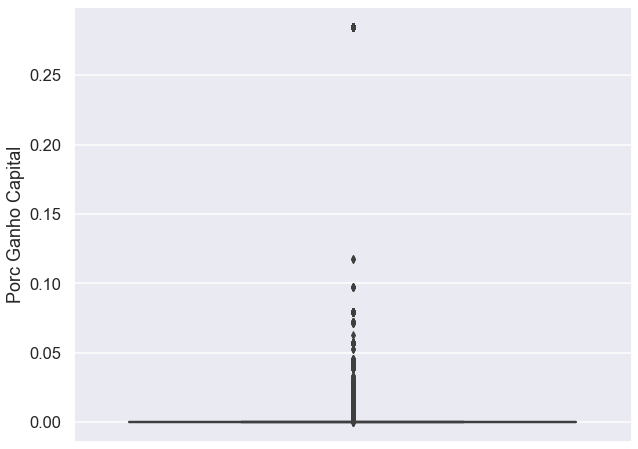

In [54]:
sns.boxplot(y="Porc Ganho Capital", data=renda2)

### Grafico de Distribuição de Porc Perda Capital

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Porc Perda Capital', ylabel='Density'>

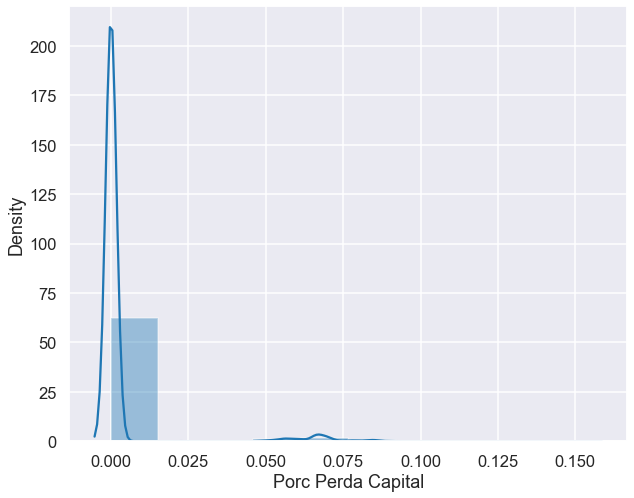

In [55]:
sns.distplot(renda2['Porc Perda Capital'], bins=10)

### Grafico de Boxplot de Porc Ganho Capital

<AxesSubplot:ylabel='Porc Perda Capital'>

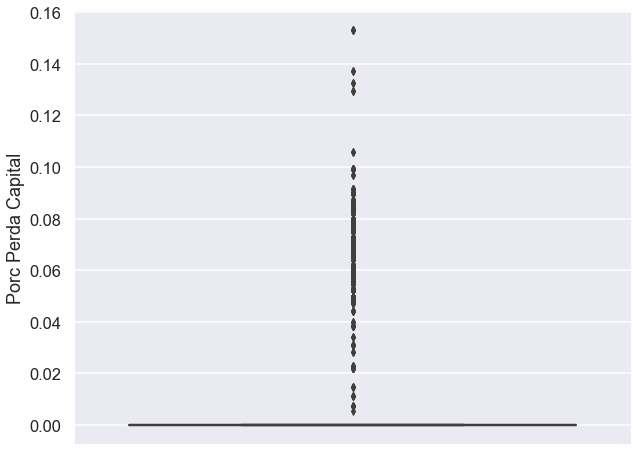

In [56]:
sns.boxplot(y="Porc Perda Capital", data=renda2)

## Variaveis Categoricas

### Grafico de Barras de Sexo

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sexo', ylabel='count'>

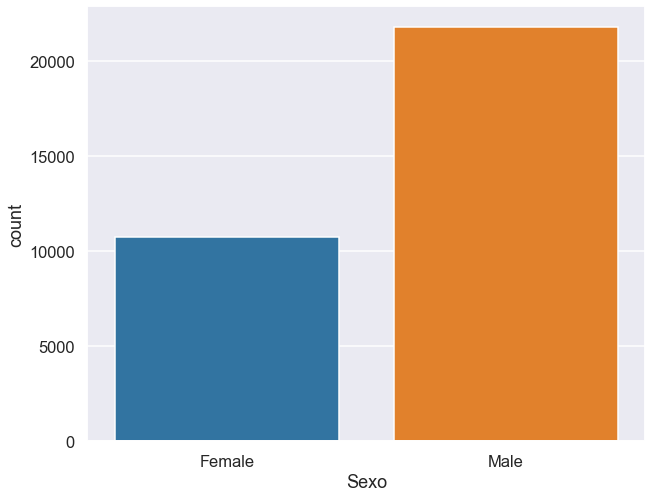

In [57]:
sns.countplot(renda2['Sexo'])

### Grafico de Barras de Renda

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Renda', ylabel='count'>

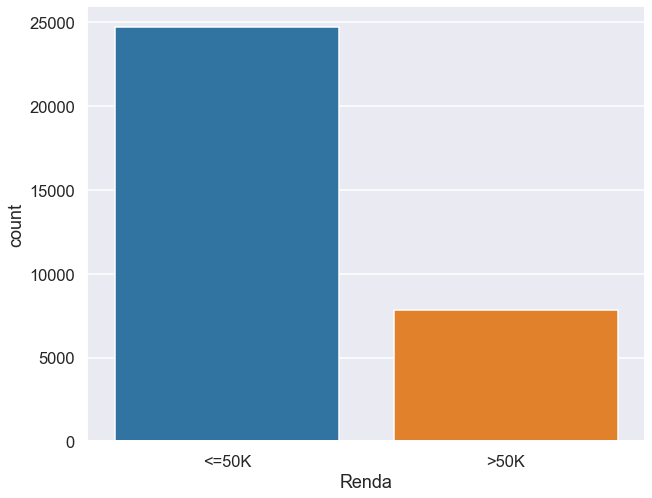

In [58]:
sns.countplot(renda2['Renda'])

### Grafico de Barras de Faixa Etaria

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Faixa Etaria', ylabel='count'>

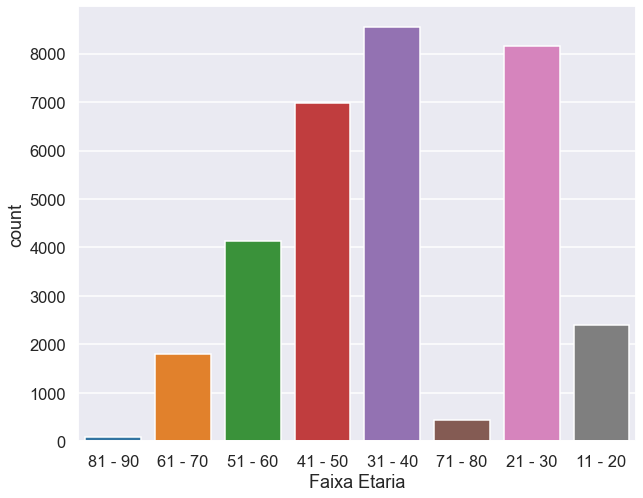

In [59]:
sns.countplot(renda2['Faixa Etaria'])

### Grafico de Barras de Relação

c:\users\marcos.fusato\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Relacao', ylabel='count'>

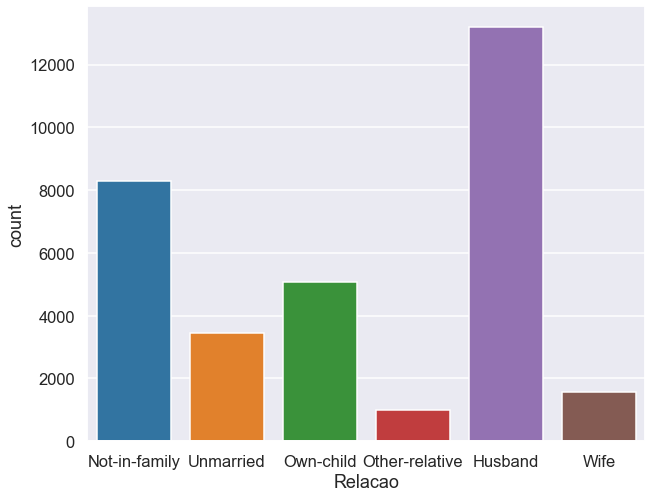

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(renda2['Relacao'])

## Analise Bivariada

### Grafico de Barras de Sexo x Renda

<AxesSubplot:xlabel='Sexo', ylabel='count'>

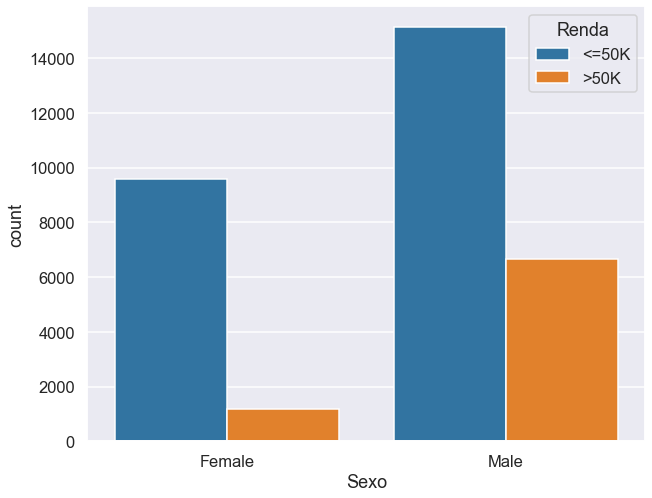

In [61]:
sns.countplot(x ='Sexo', hue="Renda", data=renda2)

### Grafico de Barras de Faixa Etaria x Renda

<AxesSubplot:xlabel='Faixa Etaria', ylabel='count'>

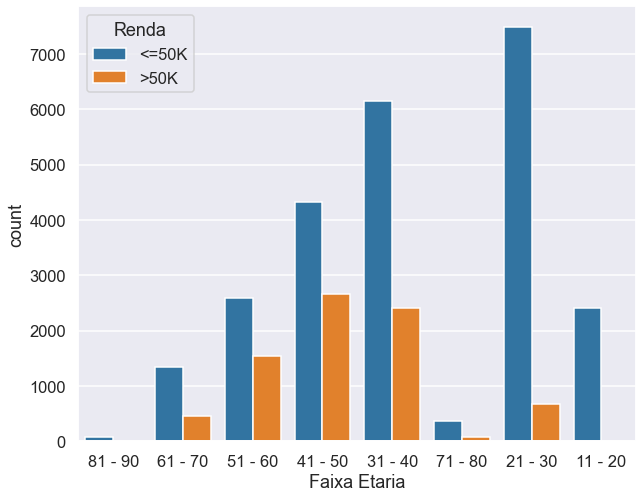

In [62]:
sns.countplot(x ='Faixa Etaria', hue="Renda", data=renda2)

### Grafico de Barras de Faixa Etaria x Sexo

<AxesSubplot:xlabel='Faixa Etaria', ylabel='count'>

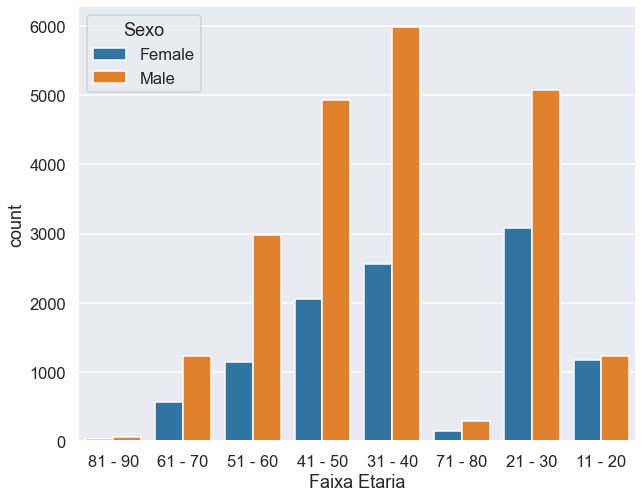

In [63]:
sns.countplot(x ='Faixa Etaria', hue="Sexo", data=renda2)

### Grafico Boxplot de Renda x Idade

<AxesSubplot:xlabel='Renda', ylabel='Idade'>

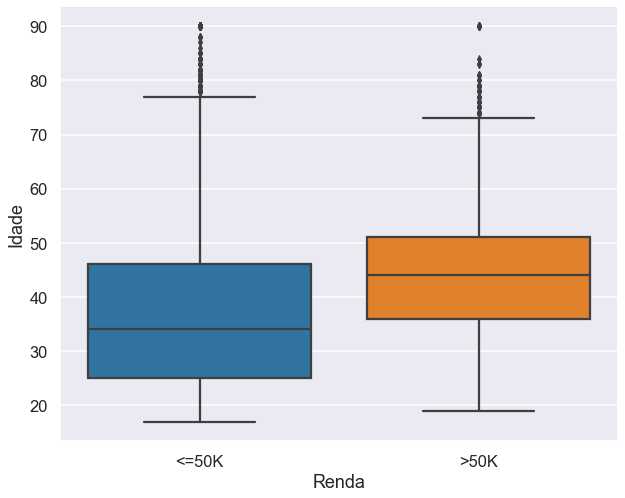

In [64]:
sns.boxplot(x='Renda', y='Idade', data=renda2)

### Grafico Boxplot de Renda x Ganho Capital

<AxesSubplot:xlabel='Renda', ylabel='Ganho Capital'>

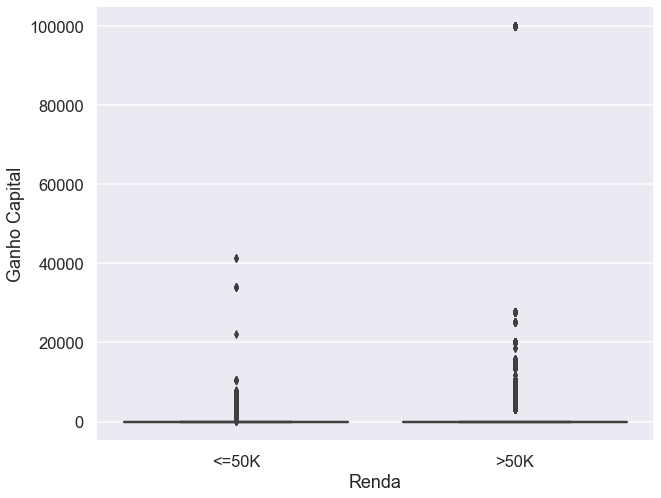

In [65]:
sns.boxplot(x='Renda', y='Ganho Capital', data=renda2)

### Grafico Boxplot de Renda x Porc Perda Capital 

<AxesSubplot:xlabel='Renda', ylabel='Porc Perda Capital'>

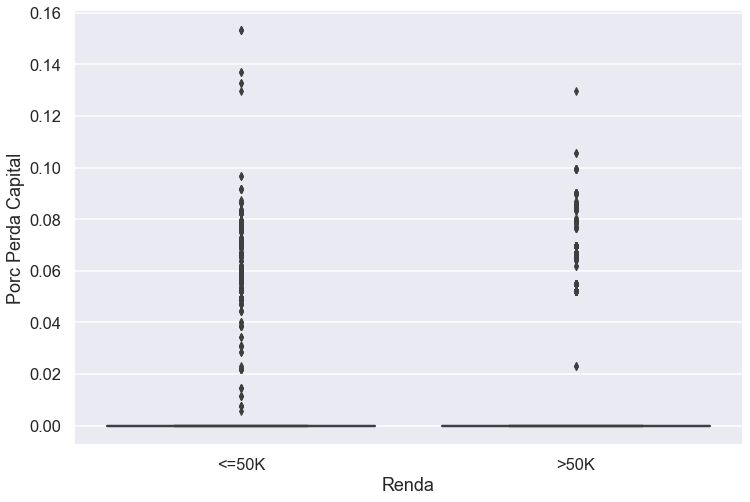

In [53]:
sns.boxplot(x='Renda', y='Porc Perda Capital', data=renda2)

### Grafico Boxplot de Sexo x Idade

<AxesSubplot:xlabel='Sexo', ylabel='Idade'>

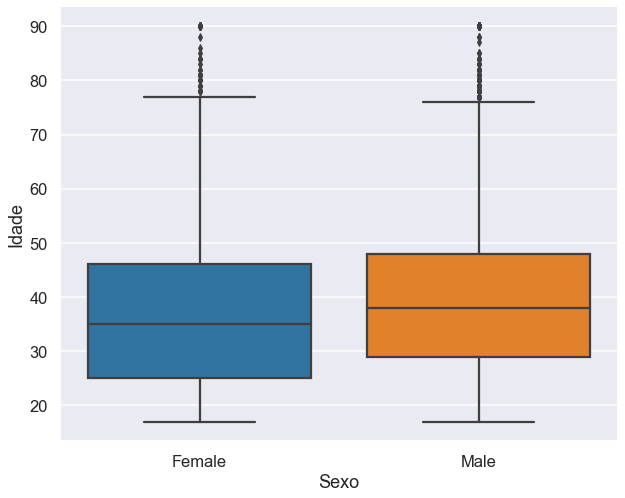

In [66]:
sns.boxplot(x='Sexo', y='Idade', data=renda2)

### Grafico Boxplot de Sexo x Porc Ganho Capital

<AxesSubplot:xlabel='Sexo', ylabel='Porc Ganho Capital'>

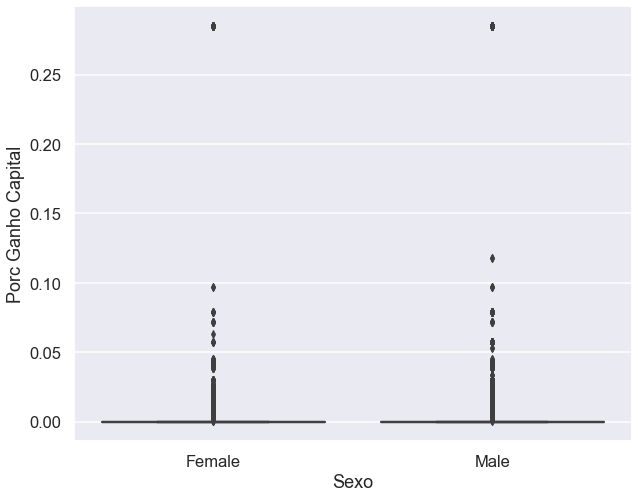

In [67]:
sns.boxplot(x='Sexo', y='Porc Ganho Capital', data=renda2)

### Grafico Boxplot de Sexo x Porc Perda Capital

<AxesSubplot:xlabel='Sexo', ylabel='Porc Perda Capital'>

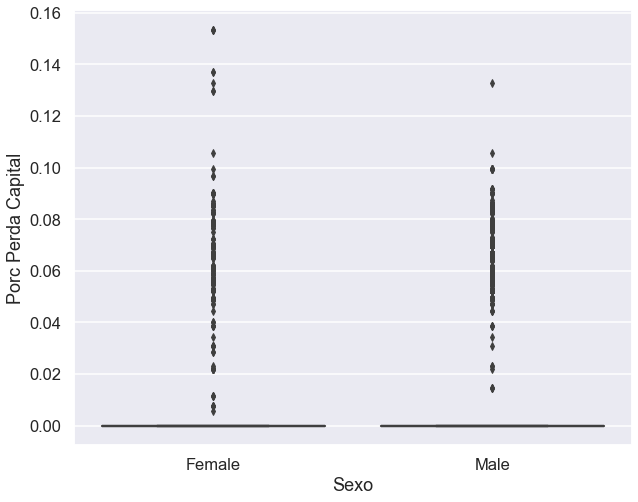

In [68]:
sns.boxplot(x='Sexo', y='Porc Perda Capital', data=renda2)

## Analise Multivariada

### Variaveis Numéricas

### Grafico scatterplot de Idade x Horas Semana por sexo

<AxesSubplot:xlabel='Idade', ylabel='Horas Semana'>

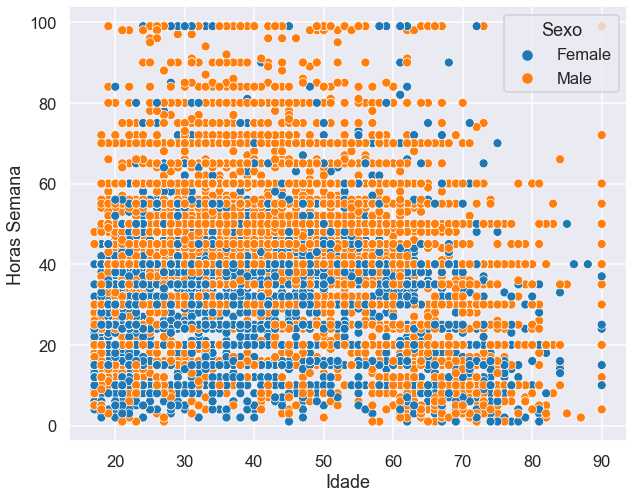

In [69]:
sns.scatterplot(x='Idade', y='Horas Semana', hue= 'Sexo', data=renda2)

### Grafico scatterplot de Idade x Ganho Capital por sexo

<AxesSubplot:xlabel='Idade', ylabel='Ganho Capital'>

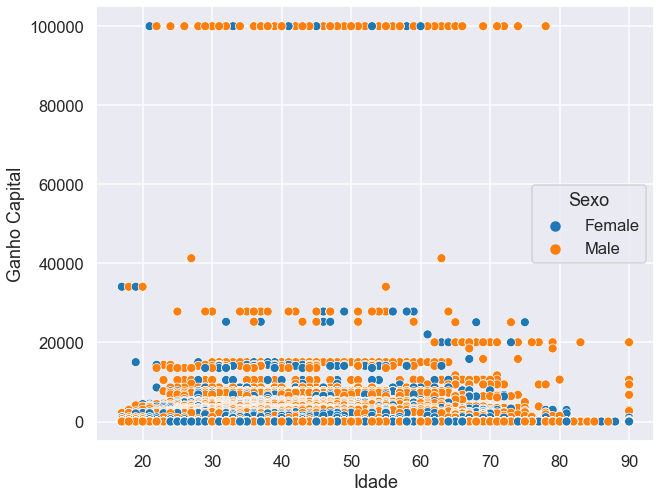

In [70]:
sns.scatterplot(x='Idade', y='Ganho Capital', hue= 'Sexo', data=renda2)

### Grafico scatterplot de Idade x Perda Capital por sexo

<AxesSubplot:xlabel='Idade', ylabel='Perda Capital'>

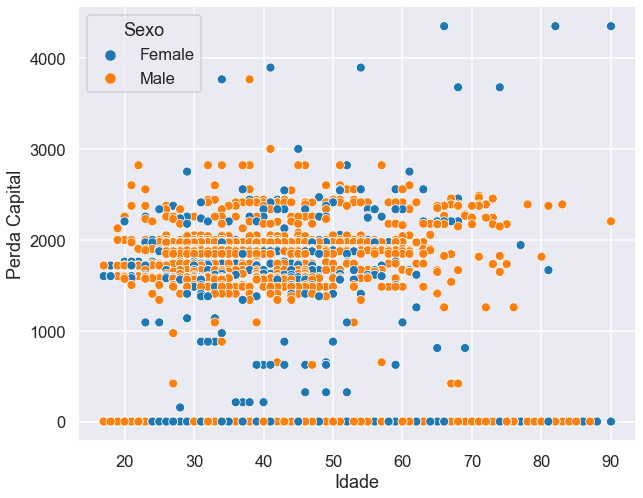

In [71]:
sns.scatterplot(x='Idade', y='Perda Capital', hue= 'Sexo', data=renda2)

### Grafico scatterplot de Horas Semana X Ganho Capital por sexo

<AxesSubplot:xlabel='Horas Semana', ylabel='Ganho Capital'>

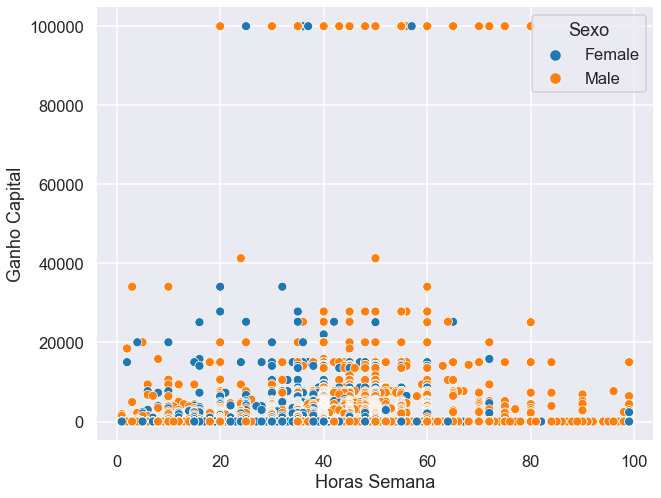

In [72]:
sns.scatterplot(x='Horas Semana', y='Ganho Capital', hue= 'Sexo', data=renda2)

### Grafico scatterplot de Horas Semana X Perda Capital por sexo

<AxesSubplot:xlabel='Horas Semana', ylabel='Perda Capital'>

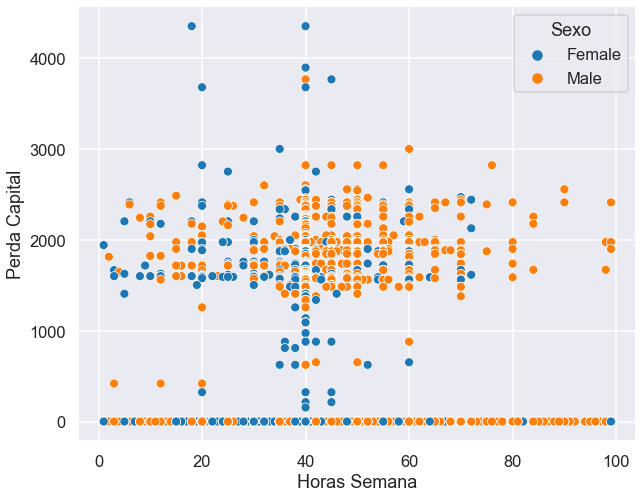

In [73]:
sns.scatterplot(x='Horas Semana', y='Perda Capital', hue= 'Sexo', data=renda2)

### Variaveis Numéricas separadas por Renda

### Grafico scatterplot de Idade x Horas Semana por Renda

<AxesSubplot:xlabel='Idade', ylabel='Horas Semana'>

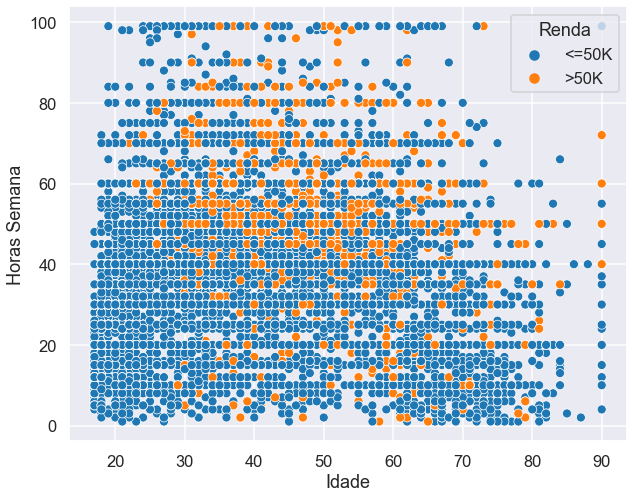

In [74]:
sns.scatterplot(x='Idade', y='Horas Semana', hue= 'Renda', data=renda2)

### Grafico scatterplot de Idade x Ganho Capital por Renda

<AxesSubplot:xlabel='Idade', ylabel='Ganho Capital'>

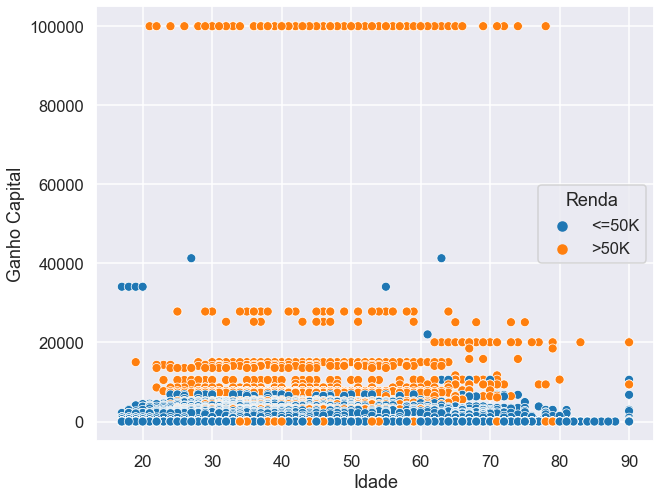

In [75]:
sns.scatterplot(x='Idade', y='Ganho Capital', hue= 'Renda', data=renda2)

### Grafico scatterplot de Idade x Perda Capital por Renda

<AxesSubplot:xlabel='Idade', ylabel='Perda Capital'>

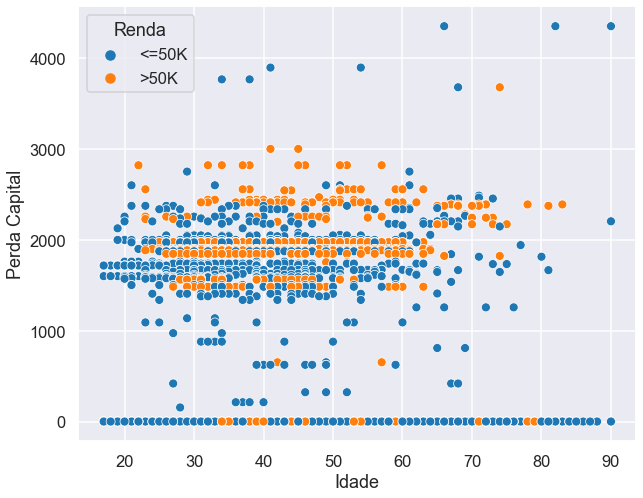

In [76]:
sns.scatterplot(x='Idade', y='Perda Capital', hue= 'Renda', data=renda2)

### Grafico scatterplot de Horas Semana X Ganho Capital por Renda

<AxesSubplot:xlabel='Horas Semana', ylabel='Ganho Capital'>

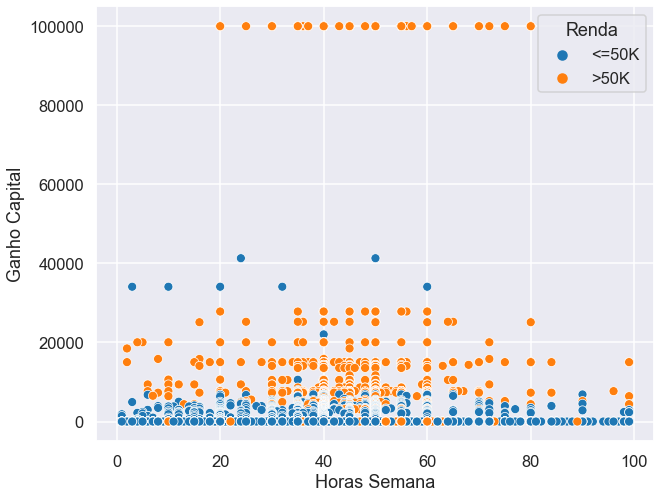

In [77]:
sns.scatterplot(x='Horas Semana', y='Ganho Capital', hue= 'Renda', data=renda2)

### Grafico scatterplot de Horas Semana X Perda Capital por Renda

<AxesSubplot:xlabel='Horas Semana', ylabel='Perda Capital'>

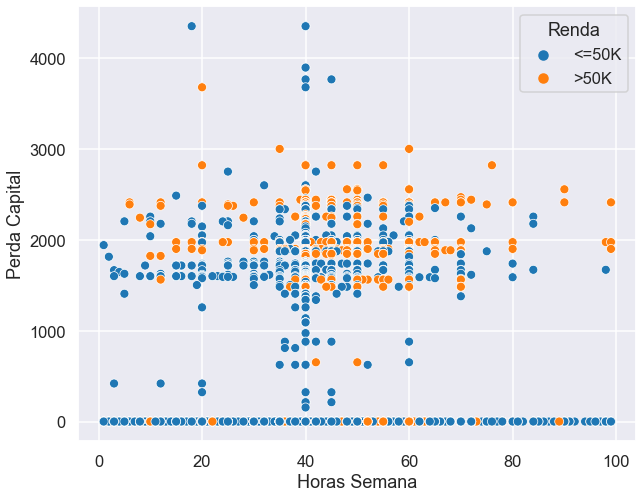

In [78]:
sns.scatterplot(x='Horas Semana', y='Perda Capital', hue= 'Renda', data=renda2)

### Mapa de calor das correlações da base de dados

<AxesSubplot:>

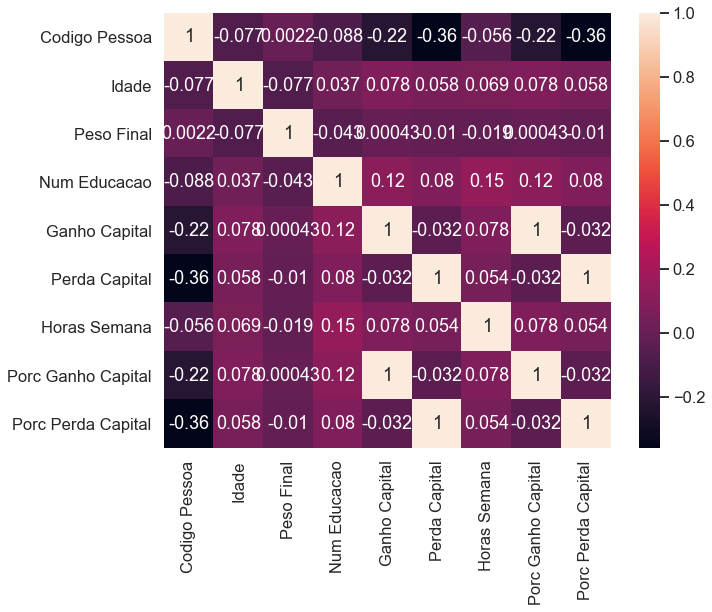

In [79]:
sns.heatmap(renda2.corr(), annot=True)